In [1]:
import xarray as xr
import os
import numpy as np
folder_path = "/home/sophiebuurman/data4/inference_output/res5_20220101/"

# for name in os.listdir(folder_path):
ds1 = xr.open_dataset(os.path.join(folder_path, "w10m_t2m_10km_pred_start-2022-01-01T00_240hforecast.nc"))
ds1_truth = xr.open_dataset(os.path.join(folder_path, "w10m_t2m_10km_truth_start-2022-01-01T00_240hforecast.nc"))

In [3]:
ds1["air_temperature_2m"]

array([[[281.18872, 281.16528, 281.11255, ..., 282.7434 , 284.54614,
         283.5852 ]],

       [[282.21942, 281.83307, 281.537  , ..., 281.3705 , 283.02997,
         282.6283 ]],

       [[284.09662, 283.73135, 283.31726, ..., 291.70325, 293.35352,
         293.42764]],

       ...,

       [[278.17548, 277.4391 , 276.4606 , ..., 280.85873, 281.00012,
         280.64853]],

       [[278.93765, 278.2697 , 277.31802, ..., 280.55804, 280.86945,
         280.59216]],

       [[279.8241 , 279.3688 , 278.47543, ..., 280.88812, 281.27234,
         280.773  ]]], dtype=float32)

In [4]:
uwind = ds1.isel(time=0)["x_wind_10m"].to_numpy()
vwind = ds1.isel(time=0)["y_wind_10m"].to_numpy()

In [5]:
windspeed = np.sqrt(np.square(uwind) + np.square(vwind))

In [6]:
str(((ds1.isel(time=1)["time"].to_numpy()-ds1.isel(time=0)["time"].to_numpy())/np.timedelta64(1, 's'))/3600)

'6.0'

In [5]:
ds1

<xarray.Dataset>
Dimensions:                       (time: 41, pressure: 13, mean_sea_level: 1,
                                   surface: 1, height_above_msl: 1, height0: 1,
                                   height1: 1, height2: 2, height3: 1,
                                   height4: 1, height5: 10, height6: 1,
                                   height7: 1, grib2_vLevel14: 1,
                                   grib2_vLevel16: 1,
                                   ...
                                   isotherm_0C_level: 1,
                                   isotherm_0C_level_from_above: 1,
                                   adiabatic_condensation_level: 1,
                                   maximum_wind_level: 1, tropopause: 1,
                                   top_of_atmosphere: 1, longitude: 4134,
                                   latitude: 4134)
Coordinates: (12/24)
  * time                          (time) datetime64[ns] 2022-06-11 ... 2022-0...
  * pressure                      (pressure) float32 50.0 100.0 ... 925.0 1e+03
  * mean_sea_level                (mean_sea_level) int64 0
  * surface                       (surface) int64 0
  * height_above_msl              (height_above_msl) float64 0.0
  * height0                       (height0) float64 0.0
    ...                            ...
  * adiabatic_condensation_level  (adiabatic_condensation_level) int64 0
  * maximum_wind_level            (maximum_wind_level) int64 0
  * tropopause                    (tropopause) int64 0
  * top_of_atmosphere             (top_of_atmosphere) int64 0
  * longitude                     (longitude) float32 0.0 0.5 ... 359.2 359.6
  * latitude                      (latitude) float32 58.88 58.88 ... 43.14 43.14
Data variables: (12/15)
    x_wind_10m                    (time, height7, longitude) float32 ...
    y_wind_10m                    (time, height7, longitude) float32 ...
    2d                            (time, height1, longitude) float32 ...
    air_temperature_2m            (time, height1, longitude) float32 ...
    cp                            (time, height0, longitude) float32 ...
    air_pressure_at_sea_level     (time, height0, longitude) float32 ...
    ...                            ...
    air_temperature_pl            (time, pressure, longitude) float32 ...
    x_wind_pl                     (time, pressure, longitude) float32 ...
    y_wind_pl                     (time, pressure, longitude) float32 ...
    upward_air_velocity_pl        (time, pressure, longitude) float32 ...
    geopotential_pl               (time, pressure, longitude) float32 ...
    forecast_reference_time       datetime64[ns] ...

pl exists
pl exists


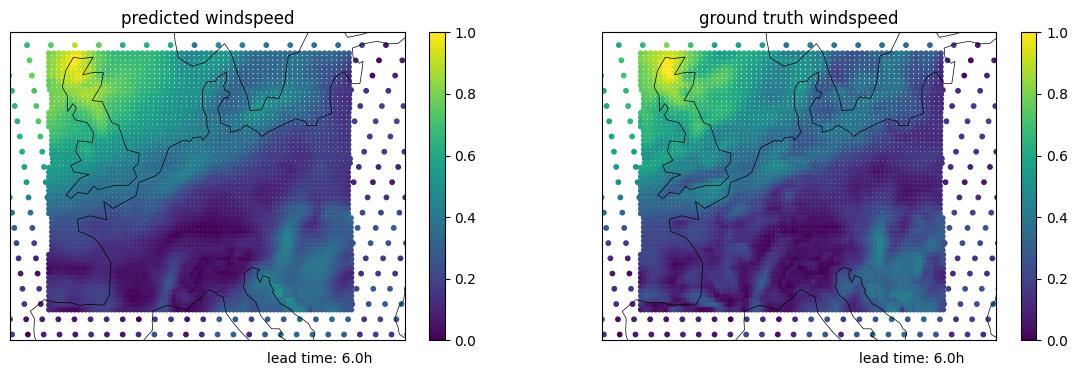

In [2]:
import xarray as xr
import os
import numpy as np
from plots import WindSpeedSinglePlotWithBoundaries
import matplotlib.pyplot as plt
folder_path = "/home/sophiebuurman/data5/inference_output/res5_rollout/"
res = "5"
var = "windspeed"
pl = 10
date = "2022-06-11"
time= "06"
rollout = 1

# for name in os.listdir(folder_path):
ds1 = xr.open_dataset(os.path.join(folder_path, f"w10m_t2m_10km_pred_start-{date}T{time}_240hforecast.nc"))
ds1_truth = xr.open_dataset(os.path.join(folder_path, f"w10m_t2m_10km_truth_start-{date}T{time}_240hforecast.nc"))
ds1_era = xr.open_dataset(os.path.join(folder_path, f"w10m_t2m_1deg_pred_start-{date}T{time}_240hforecast.nc"))

if pl is not None:
    pres = str(ds1["pressure"][pl].to_numpy())[:3]
    # title = f'predicted {var} at {pres}hPa from {date} {time}UTC'
    title = f'predicted {var}'
    gtitle = f'ground truth {var}'
    # gtitle = f'ground truth {var} at {pres}hPa'
else:
    title = f'predicted {var}'
    gtitle = f'ground truth {var}'
    # title = f'predicted {var} at from {date} {time}UTC'
    # gtitle = f'ground truth {var}'

fig, [ax1, ax2] = plt.subplots(1,2, figsize=(14,4))
WindSpeedSinglePlotWithBoundaries(fig, ax1, ds1, ds1_era, pl, rollout, title)
WindSpeedSinglePlotWithBoundaries(fig, ax2, ds1_truth, ds1_era, pl, rollout, gtitle)

if pl is not None:
    plt.savefig(f'{var}_{pres}_boundary_plot_{date}_{time}_step{rollout}_res{res}.png')
else:
    plt.savefig(f'{var}_boundary_plot_{date}_{time}_step{rollout}_res{res}.png')

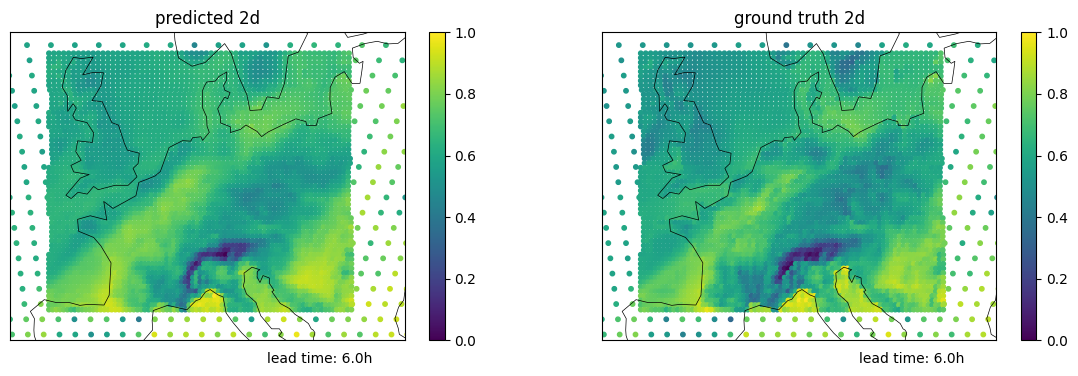

In [3]:
import xarray as xr
import os
import numpy as np
from plots import SinglePlotWithBoundaries
import matplotlib.pyplot as plt
folder_path = "/home/sophiebuurman/data5/inference_output/res5_rollout/"
res = '5r'
var = "2d"
pl = None
date = "2022-06-11"
time= "06"
rollout = 1

# for name in os.listdir(folder_path):
ds1 = xr.open_dataset(os.path.join(folder_path, f"w10m_t2m_10km_pred_start-{date}T{time}_240hforecast.nc"))
ds1_truth = xr.open_dataset(os.path.join(folder_path, f"w10m_t2m_10km_truth_start-{date}T{time}_240hforecast.nc"))
ds1_era = xr.open_dataset(os.path.join(folder_path, f"w10m_t2m_1deg_pred_start-{date}T{time}_240hforecast.nc"))

if pl is not None:
    pres = str(ds1["pressure"][pl].to_numpy())[:3]
    # title = f'predicted {var} at {pres}hPa from {date} {time}UTC'
    title = f'predicted {var}'
    gtitle = f'ground truth {var}'
    # gtitle = f'ground truth {var} at {pres}hPa'
else:
    title = f'predicted {var}'
    gtitle = f'ground truth {var}'
    # title = f'predicted {var} at from {date} {time}UTC'
    # gtitle = f'ground truth {var}'

fig, [ax1, ax2] = plt.subplots(1,2, figsize=(14,4))
SinglePlotWithBoundaries(fig, ax1, ds1, ds1_era, var, pl, rollout, title)
SinglePlotWithBoundaries(fig, ax2, ds1_truth, ds1_era, var, pl, rollout, gtitle)

if pl is not None:
    plt.savefig(f'{var}_{pres}_boundary_plot_{date}_{time}_step{rollout}_res{res}.png')
else:
    plt.savefig(f'{var}_boundary_plot_{date}_{time}_step{rollout}_res{res}.png')

MovieWriter imagemagick unavailable; using Pillow instead.


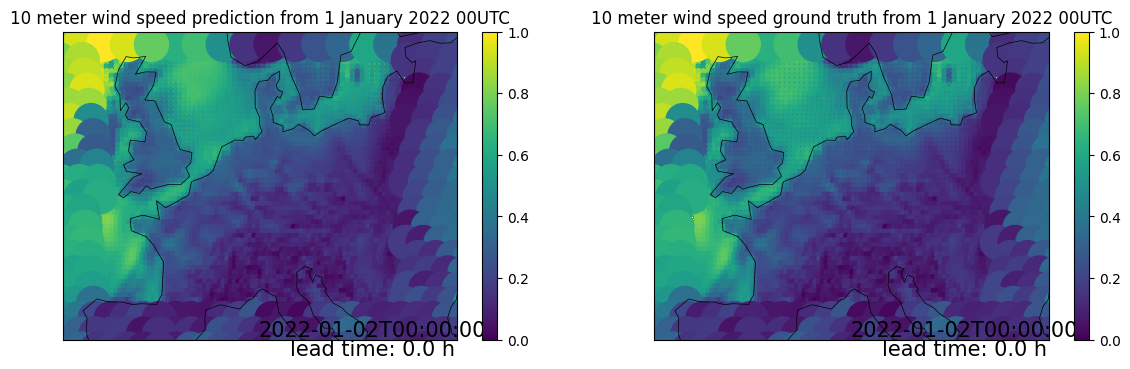

In [1]:
import matplotlib.animation as animation
import xarray as xr
import os
from aifs.diagnostics.plots import scatter_plot
import matplotlib.pyplot as plt
from aifs.utils.ecml_tools_data import open_dataset as od
import numpy as np
from plots import setaxsettings, animationUpdate
folder_path = "/home/sophiebuurman/data5/inference_output/res5_rollout/"
res = "5r"
var = "windspeed"
pl = None
date = "2022-01-02"
time= "00"

# for name in os.listdir(folder_path):
ds1 = xr.open_dataset(os.path.join(folder_path, f"w10m_t2m_10km_pred_start-{date}T{time}_240hforecast.nc"))
ds1_truth = xr.open_dataset(os.path.join(folder_path, f"w10m_t2m_10km_truth_start-{date}T{time}_240hforecast.nc"))
ds1_era = xr.open_dataset(os.path.join(folder_path, f"w10m_t2m_1deg_pred_start-{date}T{time}_240hforecast.nc"))

fig, [ax, ax2] = plt.subplots(1, 2, figsize=(14,4))
setaxsettings(fig, ax, f"10 meter wind speed prediction from 1 January 2022 00UTC", ds1, ds1_era, pl)
setaxsettings(fig, ax2, f"10 meter wind speed ground truth from 1 January 2022 00UTC", ds1_truth, ds1_era, pl)


def update(num):
    animationUpdate(ds1, ds1_era, fig, ax, num, pl)
    animationUpdate(ds1_truth, ds1_era, fig, ax2, num, pl)

ani = animation.FuncAnimation(fig, update, frames=range(0,41), repeat_delay = 100)
                            
ani.save('windspeed_res5_20200101.gif', writer='imagemagick', fps=1)

MovieWriter imagemagick unavailable; using Pillow instead.


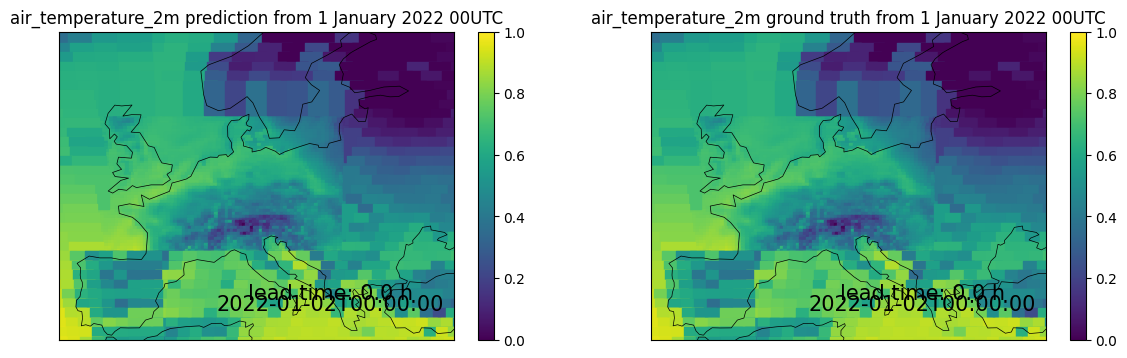

In [1]:
import matplotlib.animation as animation
import xarray as xr
import os
import matplotlib.pyplot as plt
from aifs.utils.ecml_tools_data import open_dataset as od
import numpy as np
from plots import setaxsettings_variable, animationUpdate_variable
#initialize data
folder_path = "/home/sophiebuurman/data5/inference_output/res5_rollout/"
res = "5r"
var = "air_temperature_2m"
pl = None
date = "2022-01-02"
time= "00"

# for name in os.listdir(folder_path):
ds1 = xr.open_dataset(os.path.join(folder_path, f"w10m_t2m_10km_pred_start-{date}T{time}_240hforecast.nc"))
ds1_truth = xr.open_dataset(os.path.join(folder_path, f"w10m_t2m_10km_truth_start-{date}T{time}_240hforecast.nc"))
ds1_era = xr.open_dataset(os.path.join(folder_path, f"w10m_t2m_1deg_pred_start-{date}T{time}_240hforecast.nc"))
# initialize figure
fig, [ax, ax2] = plt.subplots(1, 2, figsize=(14,4))
var_name = "air_temperature_2m"

title = f"{var_name} prediction from 1 January 2022 00UTC"
gtitle = f"{var_name} ground truth from 1 January 2022 00UTC"
setaxsettings_variable(fig, ax, title, ds1, ds1_era, var_name, pl)
setaxsettings_variable(fig, ax2, gtitle, ds1_truth, ds1_era, var_name, pl)


def update(num):
    animationUpdate_variable(ds1, ds1_era, fig, ax, num, var_name, pl)
    animationUpdate_variable(ds1_truth, ds1_era, fig, ax2, num, var_name, pl)

ani = animation.FuncAnimation(fig, update, frames=range(0,1), repeat_delay = 100)
                            
ani.save(f'{var_name}_res{res}_20200101.gif', writer='imagemagick', fps=1)

MovieWriter imagemagick unavailable; using Pillow instead.


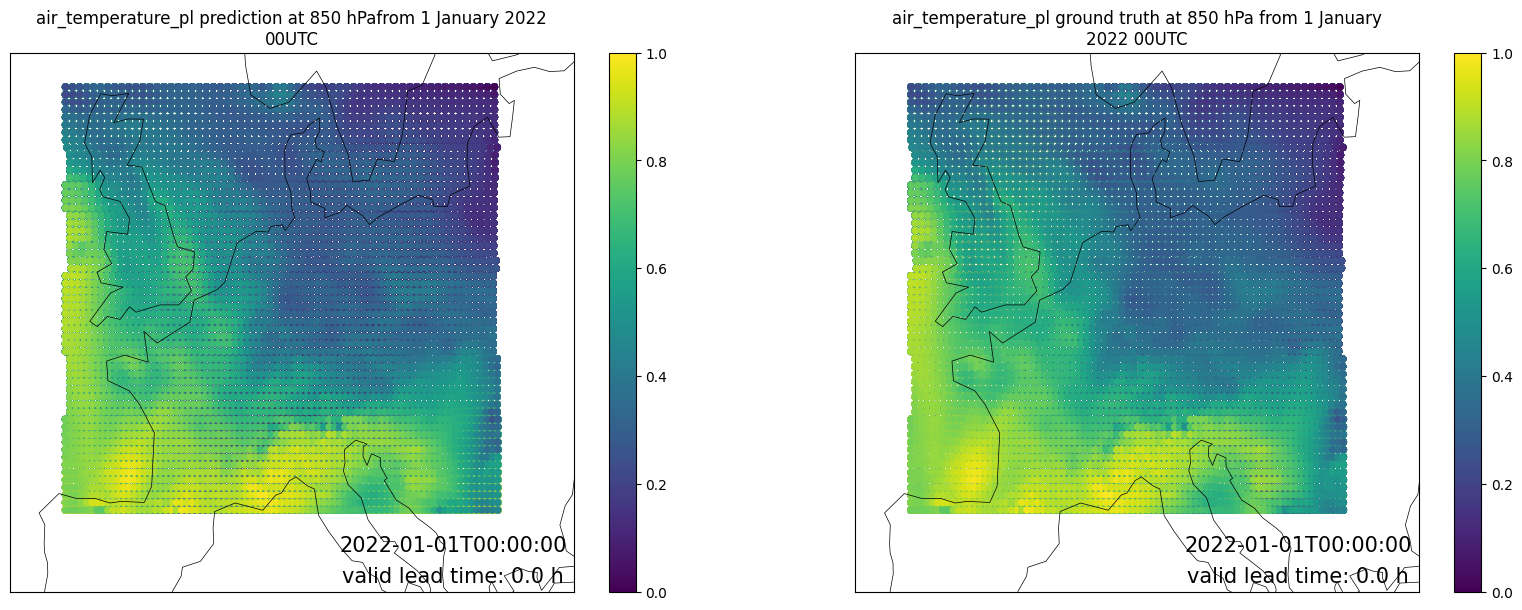

In [11]:
import matplotlib.animation as animation
import xarray as xr
import os
import matplotlib.pyplot as plt
from aifs.utils.ecml_tools_data import open_dataset as od
import numpy as np
from plots import setaxsettings_pl, animationUpdate_pl
#initialize data
folder_path = "/home/sophiebuurman/data4/inference_output/res5_20220101/"
res = 5
ds1 = xr.open_dataset(os.path.join(folder_path, "w10m_t2m_10km_pred_start-2022-01-01T00_240hforecast.nc"))
ds1_truth = xr.open_dataset(os.path.join(folder_path, "w10m_t2m_10km_truth_start-2022-01-01T00_240hforecast.nc"))

# initialize figure
fig, [ax, ax2] = plt.subplots(1, 2, figsize=(20,7))
# var_name = "air_temperature_2m"
var_name= "air_temperature_pl"
pl = "850"


In [ ]:
title = f"{var_name} prediction at {pl} hPa from 1 January 2022 00UTC"
gtitle = f"{var_name} ground truth at {pl} hPa from 1 January 2022 00UTC"
setaxsettings_pl(fig, ax, title, ds1, var_name, pl)
setaxsettings_pl(fig, ax2, gtitle, ds1_truth, var_name, pl)


def update(num):
    animationUpdate_pl(ds1, fig, ax, num, var_name, pl)
    animationUpdate_pl(ds1_truth, fig, ax2, num, var_name, pl)

ani = animation.FuncAnimation(fig, update, frames=range(0,41), repeat_delay = 100)
                            
ani.save(f'{var_name}{pl}_res{res}_20200101.gif', writer='imagemagick', fps=1)

In [16]:
leadtimes = []
for i in range(41):
    vlt = str(((ds1.isel(time=i)["time"].to_numpy()-ds1.isel(time=0)["time"].to_numpy())/np.timedelta64(1, 's'))/3600)
    leadtimes.append(vlt[:-2])
print(leadtimes)

['0', '6', '12', '18', '24', '30', '36', '42', '48', '54', '60', '66', '72', '78', '84', '90', '96', '102', '108', '114', '120', '126', '132', '138', '144', '150', '156', '162', '168', '174', '180', '186', '192', '198', '204', '210', '216', '222', '228', '234', '240']


In [9]:
ds1_truth.sel(pressure=pl).isel(time=0)["x_wind_pl"].shape

(4134,)

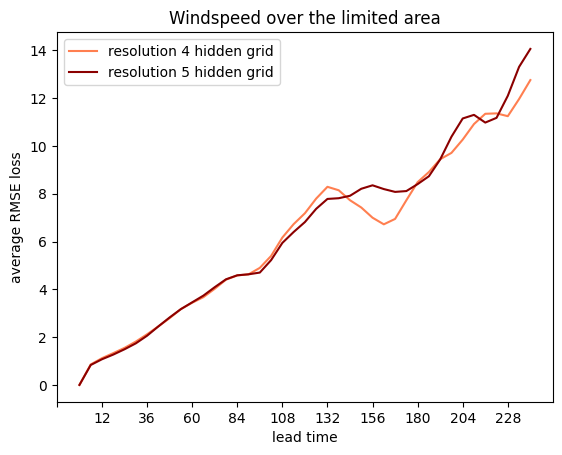

In [14]:
import xarray as xr
import os
import numpy as np
# from aifs.model.losses import limitedareaMSEloss
import torch
import numpy as np
from textwrap import wrap
from plots import getWindspeedLossRollout, limitedareaRMSEloss
import matplotlib.pyplot as plt
folder_path = "/home/sophiebuurman/data4/inference_output/res4_20220101"
var = "windspeed"
pl = None
rollouts = {}
for name in os.listdir(folder_path):
    if name[:18]=="w10m_t2m_10km_pred":
        ds1 = xr.open_dataset(os.path.join(folder_path, name))
        name = name[:14] + "truth" + name[18:]
        ds1_truth = xr.open_dataset(os.path.join(folder_path, name))
        loss = limitedareaRMSEloss(area_weights=torch.ones(ds1_truth.isel(time=0)["x_wind_10m"].shape[1]), data_split_index = torch.IntTensor([4134]))
        #loss = limitedareaRMSEloss(area_weights=torch.ones(ds1_truth.sel(pressure=pl).isel(time=0)["x_wind_pl"].shape), data_split_index = torch.IntTensor([4134]))
        for num, t in enumerate(ds1["time"]):
            rollouts = getWindspeedLossRollout(ds1, ds1_truth, rollouts, loss, num, pl)
rolloutitems = sorted(rollouts.items(), key = lambda p: p)
rolloutavg_4 = []
for (key, values) in rolloutitems:
    rolloutavg_4.append(np.sum(values)/len(values))

folder_path = "/home/sophiebuurman/data4/inference_output/res5_20220101"
rollouts = {}
for name in os.listdir(folder_path):
    if name[:18]=="w10m_t2m_10km_pred":
        ds1 = xr.open_dataset(os.path.join(folder_path, name))
        name = name[:14] + "truth" + name[18:]
        ds1_truth = xr.open_dataset(os.path.join(folder_path, name))
        loss = limitedareaRMSEloss(area_weights=torch.ones(ds1_truth.isel(time=0)["x_wind_10m"].shape[1]), data_split_index = torch.IntTensor([4134]))
        #loss = limitedareaRMSEloss(area_weights=torch.ones(ds1_truth.sel(pressure=pl).isel(time=0)["x_wind_pl"].shape), data_split_index = torch.IntTensor([4134]))
        for num, t in enumerate(ds1["time"]):
            rollouts = getWindspeedLossRollout(ds1, ds1_truth, rollouts, loss, num, pl)
rolloutitems = sorted(rollouts.items(), key = lambda p: p)
rolloutavg_5 = []
for (key, values) in rolloutitems:
    rolloutavg_5.append(np.sum(values)/len(values))

leadtimes = []
for i in range(41):
    vlt = str(((ds1.isel(time=i)["time"].to_numpy()-ds1.isel(time=0)["time"].to_numpy())/np.timedelta64(1, 's'))/3600)
    leadtimes.append(vlt[:-2])
fig, ax = plt.subplots()
#len(rollouts.keys())
ax.plot(leadtimes, rolloutavg_4, label = "resolution 4 hidden grid", c = "coral")
ax.plot(leadtimes, rolloutavg_5, label = "resolution 5 hidden grid", c = 'darkred')
ax.set_ylabel("average RMSE loss")
ax.set_xlabel("lead time")
start, end = ax.get_xlim()
plt.xticks(np.arange(start, end, 4))
ax.legend()
ax.set_title("\n".join(wrap("Windspeed over the limited area", 60)))
plt.savefig(f"Windspeed_{pl}_lam_rollout_avg_plot.png.png")


In [12]:
ds1["specific_humidity_pl"]

<xarray.Dataset>
Dimensions:                       (time: 41, pressure: 13, mean_sea_level: 1,
                                   surface: 1, height_above_msl: 1, height0: 1,
                                   height1: 1, height2: 2, height3: 1,
                                   height4: 1, height5: 10, height6: 1,
                                   height7: 1, grib2_vLevel14: 1,
                                   grib2_vLevel16: 1,
                                   ...
                                   isotherm_0C_level: 1,
                                   isotherm_0C_level_from_above: 1,
                                   adiabatic_condensation_level: 1,
                                   maximum_wind_level: 1, tropopause: 1,
                                   top_of_atmosphere: 1, longitude: 4134,
                                   latitude: 4134)
Coordinates: (12/24)
  * time                          (time) datetime64[ns] 2022-01-01 ... 2022-0...
  * pressure                      (pressure) float32 50.0 100.0 ... 925.0 1e+03
  * mean_sea_level                (mean_sea_level) int64 0
  * surface                       (surface) int64 0
  * height_above_msl              (height_above_msl) float64 0.0
  * height0                       (height0) float64 0.0
    ...                            ...
  * adiabatic_condensation_level  (adiabatic_condensation_level) int64 0
  * maximum_wind_level            (maximum_wind_level) int64 0
  * tropopause                    (tropopause) int64 0
  * top_of_atmosphere             (top_of_atmosphere) int64 0
  * longitude                     (longitude) float32 0.0 0.5 ... 359.2 359.6
  * latitude                      (latitude) float32 58.88 58.88 ... 43.14 43.14
Data variables: (12/15)
    x_wind_10m                    (time, height7, longitude) float32 ...
    y_wind_10m                    (time, height7, longitude) float32 ...
    2d                            (time, height1, longitude) float32 ...
    air_temperature_2m            (time, height1, longitude) float32 ...
    cp                            (time, height0, longitude) float32 ...
    air_pressure_at_sea_level     (time, height0, longitude) float32 ...
    ...                            ...
    air_temperature_pl            (time, pressure, longitude) float32 ...
    x_wind_pl                     (time, pressure, longitude) float32 ...
    y_wind_pl                     (time, pressure, longitude) float32 ...
    upward_air_velocity_pl        (time, pressure, longitude) float32 ...
    geopotential_pl               (time, pressure, longitude) float32 ...
    forecast_reference_time       datetime64[ns] ...

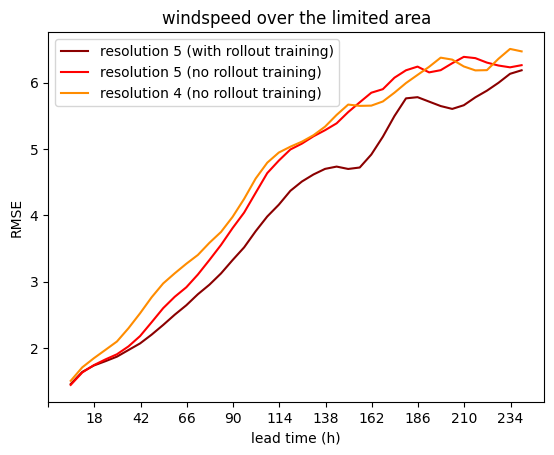

In [3]:
import xarray as xr
import os
import numpy as np
from aifs.model.losses import limitedareaMSEloss
import torch
import numpy as np
import matplotlib.pyplot as plt
from plots import PlotVarRolloutLAM
#"/home/sophiebuurman/data4/inference_output/res5_20220101": "Without rollout training", 
folder_paths = {"/home/sophiebuurman/data5/inference_output/res5_rollout": "resolution 5 (with rollout training)", "/home/sophiebuurman/data5/inference_output/res5_no_rollout": "resolution 5 (no rollout training)", "/home/sophiebuurman/data5/inference_output/res4_no_rollout": "resolution 4 (no rollout training)"}
var_name = "windspeed"
pl = "850"
PlotVarRolloutLAM(folder_paths, var_name, pl)

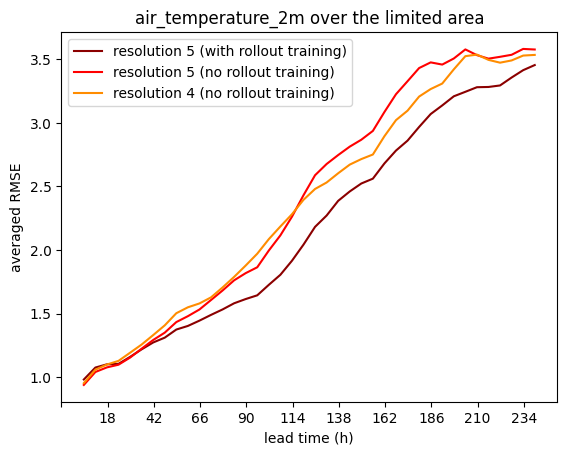

In [2]:
import xarray as xr
import os
import numpy as np
from aifs.model.losses import limitedareaMSEloss
import torch
import numpy as np
import matplotlib.pyplot as plt
from plots import PlotVarRolloutLAM
#"/home/sophiebuurman/data4/inference_output/res5_20220101": "Without rollout training", 
folder_paths = {"/home/sophiebuurman/data5/inference_output/res5_rollout": "resolution 5 (with rollout training)", "/home/sophiebuurman/data5/inference_output/res5_no_rollout": "resolution 5 (no rollout training)", "/home/sophiebuurman/data5/inference_output/res4_no_rollout": "resolution 4 (no rollout training)"}
var_name = "air_temperature_2m"
pl = None
PlotVarRolloutLAM(folder_paths, var_name, pl)

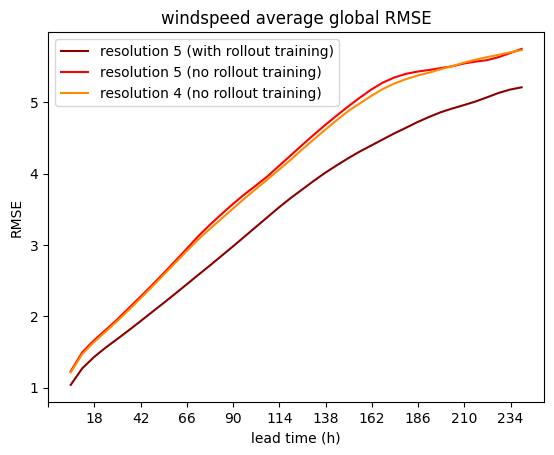

In [4]:
import xarray as xr
import os
import numpy as np

import torch
import numpy as np
import matplotlib.pyplot as plt
from plots import PlotVarRolloutERA
# "/home/sophiebuurman/data4/inference_output/01012022_00": "resolution 4 hidden grid"
# "/home/sophiebuurman/data4/inference_output/res5_20220101": "resolution 5 hidden grid"
# folder_paths = {"/home/sophiebuurman/data4/inference_output/res4_20220101": "resolution 4 hidden grid", "/home/sophiebuurman/data4/inference_output/res5_20220101": "resolution 5 hidden grid"}
#"/home/sophiebuurman/data4/inference_output/res5_20220101": "Without rollout training", 
folder_paths = {"/home/sophiebuurman/data5/inference_output/res5_rollout": "resolution 5 (with rollout training)", "/home/sophiebuurman/data4/inference_output/res5_20220101": "resolution 5 (no rollout training)", "/home/sophiebuurman/data4/inference_output/res4_20220101": "resolution 4 (no rollout training)"}
# var_name = "air_temperature_2m"[]
var_name = "windspeed"
pl = "850"
PlotVarRolloutERA(folder_paths, var_name, pl)

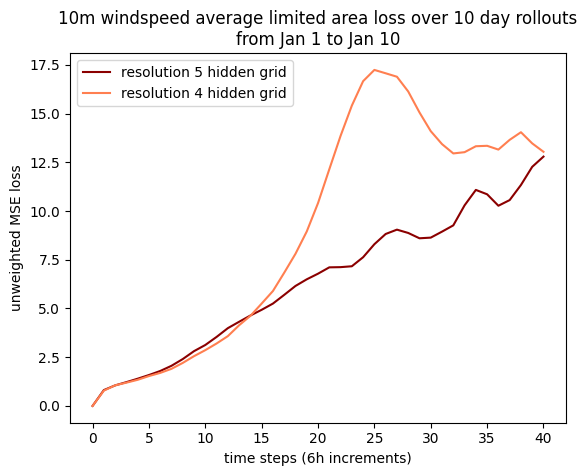

In [ ]:
import matplotlib.pyplot as plt
from textwrap import wrap
fig, ax = plt.subplots()
#len(rollouts.keys())
ax.plot(range(41), rolloutavg, label = "resolution 5 hidden grid", c = 'darkred')
ax.plot(range(41), rolloutavg_4, label = "resolution 4 hidden grid", c = "coral")
ax.set_ylabel("unweighted MSE loss")
ax.set_xlabel("time steps (6h increments)")
ax.legend()
ax.set_title("\n".join(wrap("10m windspeed average limited area loss over 10 day rollouts from Jan 1 to Jan 10", 60)))
plt.savefig("Windspeed.png")

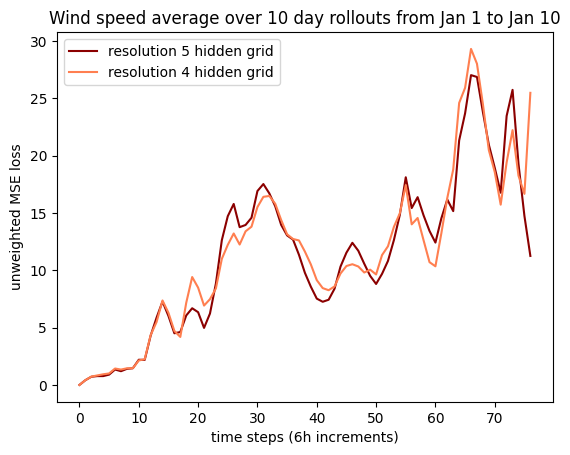

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(range(len(rollouts.keys())), rolloutavg, label = "resolution 5 hidden grid", c = 'darkred')
ax.plot(range(len(rollouts.keys())), rolloutavg_4, label = "resolution 4 hidden grid", c = "coral")
ax.set_ylabel("unweighted MSE loss")
ax.set_xlabel("time steps (6h increments)")
ax.legend()
ax.set_title("Wind speed average loss over 10 day rollouts from Jan 1 to Jan 10")
plt.show()

2022 1 2 24 0 0
(64, 129)
2022 1 2 24 0 0
(64, 129)
2022 1 2 24 0 0
(64, 129)


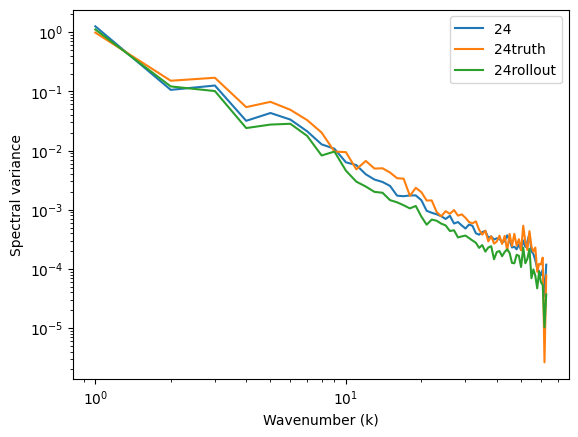

In [9]:
import datetime
from plots import compute_spectra
import pylab as pyl
import xarray as xr
import os
import numpy as np
from plots import getSpectArray
folder_path = "/home/sophiebuurman/data4/inference_output/res5_20220101/"
rollout_path = "/home/sophiebuurman/data5/inference_output/res5_rollout/"
res = 5
var = "air_temperature_pl"
pl = "850"
date = "2022-01-02"
time= "00"

# for name in os.listdir(folder_path):
ds1 = xr.open_dataset(os.path.join(folder_path, f"w10m_t2m_10km_pred_start-{date}T{time}_240hforecast.nc"))
ds1_truth = xr.open_dataset(os.path.join(folder_path, f"w10m_t2m_10km_truth_start-{date}T{time}_240hforecast.nc"))
ds1_rollout = xr.open_dataset(os.path.join(rollout_path, f"w10m_t2m_10km_pred_start-{date}T{time}_240hforecast.nc"))
lead_times = [24] # lead times to plot

### Spectral variance of det forecast

fig, ax = pyl.subplots()
for lt in lead_times:
    vstart = datetime.datetime(int(date[:4]), int(date[5:7]), int(date[8:]), 0, 0, 0)
    vnow = vstart + datetime.timedelta(hours=int(lt))

    # plot prediction spectrum
    fcst_arr = getSpectArray(ds1, date, var, lt, pl)
    spectra_nn = compute_spectra(fcst_arr)

    ax.loglog(np.arange(1, spectra_nn.shape[0]), spectra_nn[1:spectra_nn.shape[0]], label = lt)

    # plot truth spectrum
    fcst_truth_arr = getSpectArray(ds1_truth, date, var, lt, pl)
    spectra_truth_nn = compute_spectra(fcst_truth_arr)

    ax.loglog(np.arange(1, spectra_truth_nn.shape[0]), spectra_truth_nn[1:spectra_truth_nn.shape[0]], label = f'{lt}truth')

    # plot rollout spectrum
    fcst_r_arr = getSpectArray(ds1_rollout, date, var, lt, pl)
    spectra_r_nn = compute_spectra(fcst_r_arr)

    ax.loglog(np.arange(1, spectra_r_nn.shape[0]), spectra_r_nn[1:spectra_r_nn.shape[0]], label = f'{lt}rollout')
    

pyl.xlabel('Wavenumber (k)')
pyl.ylabel("Spectral variance")
pyl.legend()
pyl.show()

2022 1 1 240 0 0
(64, 129)


TypeError: _SHTOOLS.SHExpandGLQ() missing required argument 'w' (pos 2)

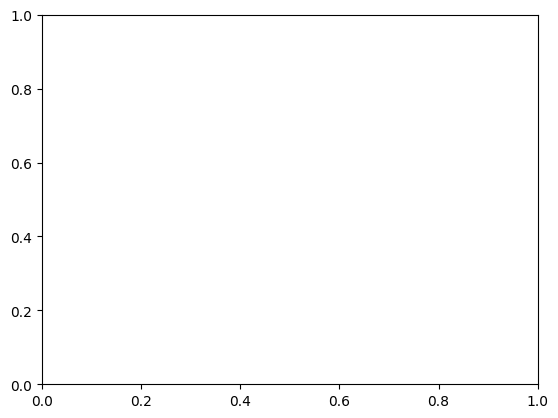

In [1]:
import datetime
from plots import compute_spectra
import pylab as pyl
import xarray as xr
import os
import numpy as np
from plots import getSpectArray
folder_path = "/home/sophiebuurman/data4/inference_output/res5_20220101/"
res = 5
var = "air_temperature_2m"
pl = None
date = "2022-01-01"
time= "00"

# for name in os.listdir(folder_path):
ds1 = xr.open_dataset(os.path.join(folder_path, f"w10m_t2m_10km_pred_start-{date}T{time}_240hforecast.nc"))
# ds1_era = xr.open_dataset(os.path.join(folder_path, f"w10m_t2m_1deg_pred_start-{date}T{time}_240hforecast.nc"))
ds1_truth = xr.open_dataset(os.path.join(folder_path, f"w10m_t2m_10km_truth_start-{date}T{time}_240hforecast.nc"))
lead_times = [240] # lead times to plot

### Spectral variance of det forecast

fig, ax = pyl.subplots()
for lt in lead_times:
    vstart = datetime.datetime(int(date[:4]), int(date[5:7]), int(date[8:]), 0, 0, 0)
    vnow = vstart + datetime.timedelta(hours=int(lt))
    # print(int(date[:4]), int(date[5:7]), int(date[8:]), int(lt), 0, 0)
    # if pl is None:
    #     fcst = ds1.sel(time=vnow)[var].to_numpy()
    # else:
    #     fcst = ds1.sel(pressure=pl).sel(time=vnow)[var].to_numpy()
    # fcst_arr = fcst
    fcst_arr = getSpectArray(ds1, date, var, lt, pl)
    spectra_nn = compute_spectra(fcst_arr)
    print(spectra_nn)
    ax.loglog(np.arange(1, spectra_nn.shape[0]), spectra_nn[1:spectra_nn.shape[0]], label = lt)
    fcst_truth_arr = getSpectArray(ds1_truth, date, var, lt, pl)
    # if pl is None:
    #     fcst = ds1_truth.sel(time=vnow)[var].to_numpy()
    # else:
    #     fcst = ds1_truth.sel(pressure=pl).sel(time=vnow)[var].to_numpy()
    # fcst_truth_arr = fcst
    spectra_truth_nn = compute_spectra(fcst_truth_arr)

    ax.loglog(np.arange(1, spectra_truth_nn.shape[0]), spectra_truth_nn[1:spectra_truth_nn.shape[0]], label = f'{lt}truth')
    

pyl.xlabel('Wavenumber (k)')
pyl.ylabel("Spectral variance")
pyl.legend()
pyl.show()

2022 1 1 24 0 0
(64, 129)


TypeError: _SHTOOLS.SHExpandGLQ() missing required argument 'w' (pos 2)

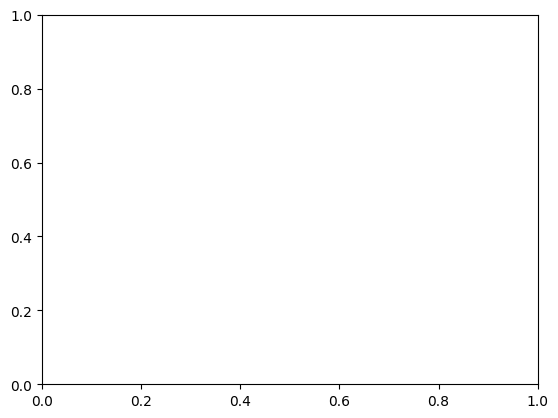

In [47]:
from aifs.diagnostics.plots import EquirectangularProjection
lonlat = np.append(np.expand_dims(ds1["latitude"].to_numpy(), axis=1),np.expand_dims(ds1["longitude"].to_numpy(), axis=1), axis = 1)
pc = EquirectangularProjection()
lat, lon = lonlat[:, 0], lonlat[:, 1]
pc_lon, pc_lat = pc(lon, lat) 

In [5]:
fcst

NameError: name 'fcst' is not defined

In [65]:
len(fcst[0])

4134

In [58]:
x = np.linspace(min(pc_lon), max(pc_lon), 64)
y = np.linspace(min(pc_lat), max(pc_lat), 129)
xv, yv = np.meshgrid(x, y)

In [71]:
import scipy
scipy.interpolate.griddata(points = pc(lon, lat), values = fcst[0], xi = (xv, yv), method = "nearest")

array([[283.4681 , 282.70224, 280.3004 , ..., 281.05365, 278.59323,
        278.79935],
       [283.4681 , 282.70224, 280.3004 , ..., 281.05365, 278.59323,
        278.79935],
       [284.13538, 285.5043 , 285.75085, ..., 280.45715, 278.75058,
        279.6803 ],
       ...,
       [280.55005, 279.0326 , 277.72336, ..., 266.143  , 266.1971 ,
        266.1971 ],
       [280.90414, 279.39154, 279.8201 , ..., 265.87885, 265.57397,
        265.57397],
       [280.90414, 279.39154, 279.8201 , ..., 265.87885, 265.57397,
        265.57397]], dtype=float32)